In [1]:
import sys

sys.path.append("../")

import jax
import jax.numpy as jnp
from jax import random
from functools import partial
import chex
from neat_jax import Network, ActivationState, make_network, plot_network, Mutations

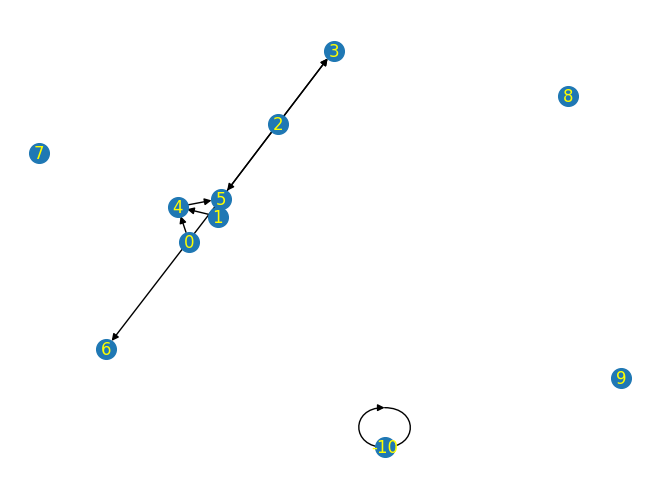

In [2]:
max_nodes = 10
key = jax.random.PRNGKey(0)

init_params = {
    "max_nodes": max_nodes,
    "senders": jnp.array([0, 1, 1, 2, 2, 4, 5, 5]),
    "receivers": jnp.array([4, 4, 5, 3, 5, 5, 3, 6]),
    "weights": jnp.array([1, 1, 1, 1, 1, 1, 1, 1]),
    "activation_indices": jnp.array([0, 0, 0, 0, 0, 0, 0]),
    "node_types": jnp.array([0, 0, 0, 2, 1, 1, 2]),
    "inputs": jnp.array([0.4, 0.3, 0.5]),
    "output_size": 2,
}

activation_state, net = make_network(**init_params)

plot_network(net)

In [3]:
net

node_indices: [0 1 2 3 4 5 6 7 8 9]
node_types: [0 0 0 2 1 1 2 3 3 3]
activation_indices: [0 0 0 0 0 0 0 0 0 0]
weights: [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
senders: [  0   1   1   2   2   4   5   5 -10 -10]
receivers: [  4   4   5   3   5   5   3   6 -10 -10]
output_size: 2


In [4]:
net.weights

Array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0.], dtype=float32)

In [5]:
mutations = Mutations(max_nodes=max_nodes)

In [6]:
mutations.weight_shift(net, key, 0.1).weights

Array([0.7389442, 1.0033853, 1.1086333, 1.       , 1.       , 1.       ,
       1.       , 1.       , 0.       , 0.       ], dtype=float32)

In [7]:
mutations.weight_mutation(net, key).weights

Array([-0.26105583,  0.00338528,  0.10863334,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  0.        ,  0.        ],      dtype=float32)

In [8]:
valid_senders = jnp.int32(net.node_types < 2)
selected = random.choice(key, valid_senders, p=valid_senders/valid_senders.sum())
net.senders[selected], net.receivers[selected]

(Array(1, dtype=int32), Array(4, dtype=int32))

node_indices: [0 1 2 3 4 5 6 7 8 9]
node_types: [0 0 0 2 1 1 2 1 3 3]
activation_indices: [0 0 0 0 0 0 0 0 1 0]
weights: [ 1.          0.          1.          1.          1.          1.
  1.          1.          0.12636864 -0.00423024]
senders: [ 0 -1  1  2  2  4  5  5  1  7]
receivers: [ 4 -4  5  3  5  5  3  6  7  4]
output_size: 2



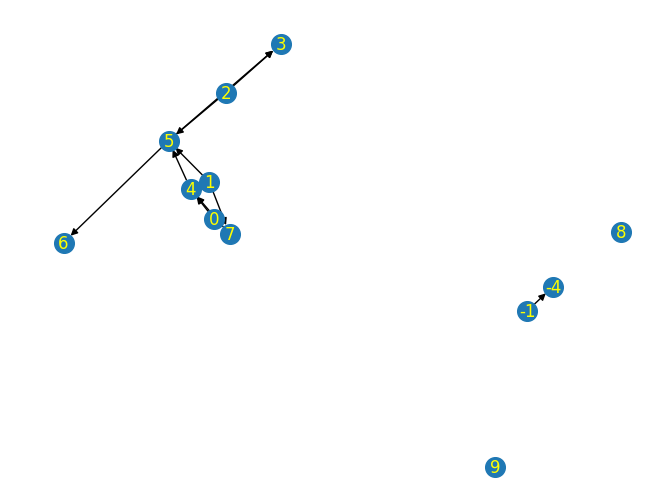

In [9]:
print(mutations.add_node(net, key))
plot_network(mutations.add_node(net, key))

In [10]:
jnp.bincount(net.node_types)

Array([3, 2, 2, 3], dtype=int32)

In [11]:
net.node_type_counts

Array([3, 2, 2, 3], dtype=int32)